In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
#Import trials that were classified as "bored"
boredom = pd.read_csv('D:\\df_nathan.csv')

#Rename each parcel to match its corresponding macroparcel
macro_parcels = pd.read_csv('C:\\Users\\natha\\Desktop\\Neuromatch\\mmp_macro.csv',header=None)
mp = macro_parcels.iloc[:,-1]
mp = np.tile(mp,2)
boredom.columns = mp

#take the average of macroparcels for each trial
boredom = boredom.mean(axis=1, level=0)

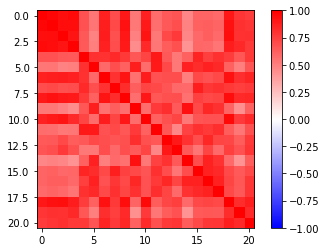

In [44]:
#create a correlation coefficient matrix across all trials

new_bored = boredom.T
coef = np.corrcoef(new_bored)
plt.imshow(coef, interpolation="none", cmap="bwr", vmin=-1, vmax=1)
plt.colorbar()
plt.show()

In [45]:
#Turn correlation coefficient matrix into a vector of absolute values
coef = coef.flatten('C')
coef = abs(coef)
coef = np.array(coef)

#sort vector from least to greatest
min2max = pd.DataFrame(coef)
min2max = min2max.sort_values(by = [0],ascending=True,axis=0)

In [46]:
#Create labels for correlation coefficient matrix
#(I'm new to python, but I'm positive there's a more efficient way to do this. I apologize.)

x_parcels = boredom.columns
y_parcels = boredom.columns
repeat = []
keep = []
x_y_comb = []
plus = ' + '

for y in range(0,len(y_parcels)): #all x's, same y -- and repeat for every y
    for x in range(0,len(x_parcels)):
        x_y = x_parcels[x] + plus + y_parcels[y]
        x_y_comb.append(x_y)
        if x_parcels[x] == y_parcels[y]: #indexing the repeats
            rep = (len(x_y_comb)) - 1
            repeat.append(rep)
        if x_parcels[x] != y_parcels[y]: #indexing the repeats
            nonrep = x_parcels[x] + plus + y_parcels[y]
            keep.append(nonrep)

x_y_comb = np.array(x_y_comb)

In [47]:
#rename columns so that the correlation coefficient corresponds to the parcel x parcel correlation
new_df = np.transpose(coef)
new_df = pd.DataFrame(coef)
new_df = np.transpose(new_df)
new_df.columns = x_y_comb

#Delete the columns that are correlations between same parcels
new_df = np.array(new_df)
new_df = np.delete(new_df,repeat)
new_df = pd.DataFrame(new_df).T
new_df.columns = np.array(keep)

In [48]:
#If interested in the correlation coefficients between parcels
print(new_df)

   Visual (TPO) + Early Visual  Dorsal Visual + Early Visual  \
0                     0.973519                       0.94204   

   Ventral Visual + Early Visual  Sensorimotor + Early Visual  \
0                       0.956013                     0.675272   

   Premotor + Early Visual  Posterior Cingulate + Early Visual  \
0                 0.536802                            0.868579   

   Early Auditory + Early Visual  \
0                       0.698509   

   Temporal-Parietal-Occipital Junction + Early Visual  dlPFC + Early Visual  \
0                                           0.905021                0.523758   

   Superior Parietal + Early Visual                 ...                  \
0                          0.864272                 ...                   

   Superior Parietal + Lateral Temporal  \
0                              0.829579   

   Paracentral & Mid Cingulate + Lateral Temporal  \
0                                        0.681163   

   ACC & mPFC + Lateral Temp

In [49]:
#Import all correct 2-back trials
wm = pd.read_csv('D:\\df_wm_cor_2bk.csv')
wm = pd.DataFrame(wm)
wm = wm.iloc[:,13:-1]

#take the average of macroparcels for each trial
wm.columns = mp
wm = wm.mean(axis=1, level=0)

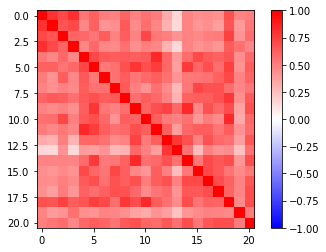

In [50]:
#create a correlation coefficient matrix across all trials
new_wm = wm.T
coef = np.corrcoef(new_wm)
plt.imshow(coef, interpolation="none", cmap="bwr", vmin=-1, vmax=1)
plt.colorbar()
plt.show()

In [51]:
#Create labels for correlation coefficient matrix, but for the 2-back data

#Turn correlation coefficient matrix into a vector of absolute values
coef = coef.flatten('C')
coef = abs(coef)
coef = np.array(coef)

#sort vector from least to greatest
min2max = pd.DataFrame(coef)
min2max = min2max.sort_values(by = [0],ascending=True,axis=0)

In [52]:
##Create labels for correlation coefficient matrix

x_parcels = wm.columns
y_parcels = wm.columns
x_y_comb = []
repeat = []
keep = []
plus = ' + '

for y in range(0,len(y_parcels)): #all x's, same y -- and repeat for every y
    for x in range(0,len(x_parcels)):
        x_y = x_parcels[x] + plus + y_parcels[y]
        x_y_comb.append(x_y)
        if x_parcels[x] == y_parcels[y]: #indexing the repeats
            rep = (len(x_y_comb)) - 1
            repeat.append(rep)
        if x_parcels[x] != y_parcels[y]: #indexing the repeats
            nonrep = x_parcels[x] + plus + y_parcels[y]
            keep.append(nonrep)
            
x_y_comb = np.array(x_y_comb)

In [53]:
#rename columns so that the correlation coefficient corresponds to the parcel x parcel correlation
new_df_wm = np.transpose(coef)
new_df_wm = pd.DataFrame(coef)
new_df_wm = np.transpose(new_df_wm)
new_df_wm.columns = x_y_comb

#Delete the columns that are correlations between same parcels
new_df_wm = np.array(new_df_wm)
new_df_wm = np.delete(new_df_wm,repeat)
new_df_wm = pd.DataFrame(new_df_wm).T
new_df_wm.columns = np.array(keep)

In [54]:
#If interested in the correlation coefficients between parcels
print(new_df_wm)

   Visual (TPO) + Early Visual  Dorsal Visual + Early Visual  \
0                      0.79761                      0.718275   

   Ventral Visual + Early Visual  Sensorimotor + Early Visual  \
0                       0.816479                     0.532015   

   Premotor + Early Visual  Posterior Cingulate + Early Visual  \
0                 0.620374                            0.514019   

   Early Auditory + Early Visual  \
0                       0.484847   

   Temporal-Parietal-Occipital Junction + Early Visual  dlPFC + Early Visual  \
0                                           0.602274                0.489899   

   Superior Parietal + Early Visual                 ...                  \
0                          0.552488                 ...                   

   Superior Parietal + Lateral Temporal  \
0                              0.598641   

   Paracentral & Mid Cingulate + Lateral Temporal  \
0                                        0.576634   

   ACC & mPFC + Lateral Temp

In [55]:
#Which correlations during "bored" trials were higher relative to correlation during correct 2-back WM trials
bor_min_wm = new_df - new_df_wm
bor_min_wm.sort_values(by=0, axis=1, ascending=False, inplace=True)
#Select every other column, since X x Y and Y x X correlations are redundant
bor_min_wm = bor_min_wm[bor_min_wm.columns[::2]]

#Print results
print(bor_min_wm)

   Visual (TPO) + Orbital Frontal  Orbital Frontal + Ventral Visual  \
0                        0.542384                          0.532488   

   Early Visual + Orbital Frontal  Posterior Cingulate + Visual (TPO)  \
0                        0.505632                            0.455953   

   Superior Parietal + Medial Temporal  Medial Temporal + Orbital Frontal  \
0                             0.439535                           0.430855   

   Medial Temporal + Visual (TPO)  \
0                        0.415773   

   Temporal-Parietal-Occipital Junction + Medial Temporal  \
0                                           0.400571        

   Ventral Visual + Posterior Cingulate  \
0                              0.389834   

   Orbital Frontal + Temporal-Parietal-Occipital Junction  \
0                                           0.379287        

               ...               Inferior Frontal + Lateral Temporal  \
0              ...                                         -0.061299   

  

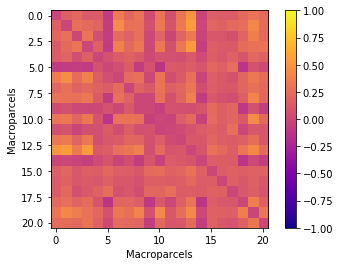

In [56]:
#Show the resulting correlation coefficient matrix

new_bored = boredom.T
coef1 = np.corrcoef(new_bored)
new_wm = wm.T
coef2 = np.corrcoef(new_wm)
diff_mat = coef1 - coef2

plt.imshow(diff_mat, interpolation="none", cmap="plasma", vmin=-1, vmax=1)
plt.colorbar()
plt.xlabel('Macroparcels')
plt.ylabel('Macroparcels')

plt.show()

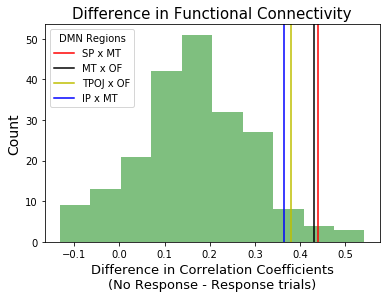

In [57]:
#Plot histogram of the difference in correlation coefficients
plt.hist(bor_min_wm,color = 'g',alpha=.5)

#These correlations were hand-selected (i.e., brute forced) simply for illustration
plt.axvline(np.array(bor_min_wm['Superior Parietal + Medial Temporal']), color='r', label='SP x MT')
plt.axvline(np.array(bor_min_wm['Medial Temporal + Orbital Frontal']),color='k',label = 'MT x OF')
plt.axvline(np.array(bor_min_wm['Orbital Frontal + Temporal-Parietal-Occipital Junction']),color='y',label = 'TPOJ x OF')
plt.axvline(np.array(bor_min_wm['Inferior Parietal + Medial Temporal']),color='b',label = 'IP x MT')
plt.legend(title='DMN Regions')

plt.title('Difference in Functional Connectivity',fontsize=15)
plt.xlabel('Difference in Correlation Coefficients\n(No Response - Response trials)',fontsize=13)
plt.ylabel('Count',fontsize=14)
plt.show()